# Feature selection based on the mutual information with mRmR

*Fubang ZHAO* & *Xiao PAN* & *Xiangnan YUE*

In [1]:
from mRmR import FetureSelection_mRmR
from sklearn.datasets import make_classification, make_regression
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Experiments with Generated Data

In [2]:
s = 2000
f = 100
i = int(.1 * f)
r = int(.05 * f)
c = 2
n_features = 50

In [3]:
def myplot(clf, title, mRmR, X_train, y_train, X_test, y_test, n_features=50):
    predicts_skb = []
    predicts_mRmR = []
    for i in range(1, n_features):
        skb = SelectKBest(k = i)
        skb.fit(X_train, y_train)
        clf.fit(skb.transform(X_train), y_train)
        predicts_skb.append(clf.score(skb.transform(X_test), y_test))
        clf.fit(mRmR.transform(X_train)[:, :i], y_train)
        predicts_mRmR.append(clf.score(mRmR.transform(X_test)[:, :i], y_test))
    plt.plot(predicts_mRmR, label='mRmR')
    plt.plot(predicts_skb, label='KBest')
    plt.title("The accuracy with the increase of features: %r" %title)
    plt.legend()
    plt.show()

In [4]:
# simulate dataset with discrete class labels in y
X, y = make_classification(n_samples=s, n_features=f, n_informative=i,
                           n_redundant=r, n_clusters_per_class=c,
                           random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [5]:
mRmR = FetureSelection_mRmR(verbose=2, n_jobs=-1, n_features=n_features)
mRmR.fit(X_train, y_train)

Manual model---Selected feature # 1/50: 7, Mutual Information: 0.0503
Manual model---Selected feature # 2/50: 12, Mutual Information: 0.3162
Manual model---Selected feature # 3/50: 47, Mutual Information: 0.2043
Manual model---Selected feature # 4/50: 28, Mutual Information: 0.0602
Manual model---Selected feature # 5/50: 5, Mutual Information: 0.0505
Manual model---Selected feature # 6/50: 2, Mutual Information: 0.0505
Manual model---Selected feature # 7/50: 46, Mutual Information: 0.0505
Manual model---Selected feature # 8/50: 62, Mutual Information: 0.0505
Manual model---Selected feature # 9/50: 32, Mutual Information: 0.0505
Manual model---Selected feature # 10/50: 8, Mutual Information: 0.0505
Manual model---Selected feature # 11/50: 76, Mutual Information: 0.0505
Manual model---Selected feature # 12/50: 94, Mutual Information: 0.0505
Manual model---Selected feature # 13/50: 92, Mutual Information: 0.0505
Manual model---Selected feature # 14/50: 4, Mutual Information: 0.0505
Manual

In [6]:
fs_mRmR = mRmR.getSelectedFeatures()
print fs_mRmR

[7L, 12, 47, 28, 5, 2, 46, 62, 32, 8, 76, 94, 92, 4, 86, 18, 93, 57, 0, 88, 66, 11, 51, 99, 90, 79, 52, 15, 98, 29, 77, 35, 49, 36, 63, 75, 33, 34, 40, 27, 78, 31, 95, 80, 19, 41, 70, 21, 10, 20]


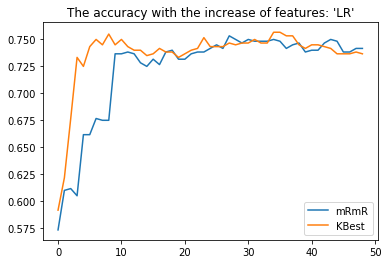

In [7]:
clf = LogisticRegression()
myplot(clf, "LR", mRmR, X_train, y_train, X_test, y_test)

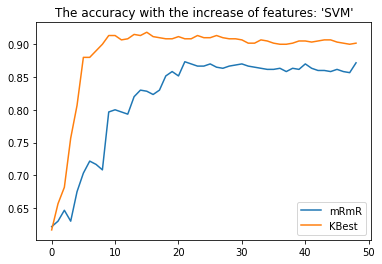

In [8]:
clf = svm.SVC()
myplot(clf, "SVM", mRmR, X_train, y_train, X_test, y_test)

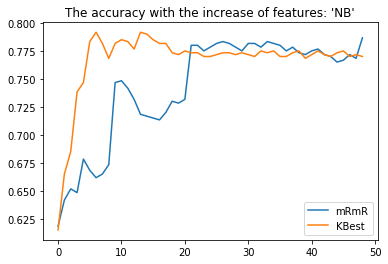

In [9]:
clf = GaussianNB()
myplot(clf, "NB", mRmR, X_train, y_train, X_test, y_test)

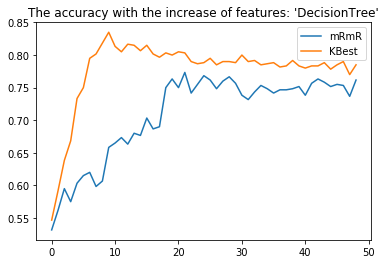

In [10]:
clf = tree.DecisionTreeClassifier()
myplot(clf, "DecisionTree", mRmR, X_train, y_train, X_test, y_test)

In [11]:
mRmR = FetureSelection_mRmR(verbose=2, n_jobs=-1, n_features='auto')
mRmR.fit(X_train, y_train)

Auto model---Selected feature # 1: 7, Mutual Information: 0.0503
Auto model---Selected feature # 2: 12, Mutual Information: 0.3162
Auto model---Selected feature # 3: 47, Mutual Information: 0.2043
Auto model---Selected feature # 4: 28, Mutual Information: 0.0602
Auto model---Selected feature # 5: 5, Mutual Information: 0.0505
Auto model---Selected feature # 6: 2, Mutual Information: 0.0505
Auto model---Selected feature # 7: 46, Mutual Information: 0.0505
Auto model---Selected feature # 8: 62, Mutual Information: 0.0505
Auto model---Selected feature # 9: 32, Mutual Information: 0.0505
Auto model---Selected feature # 10: 8, Mutual Information: 0.0505
Auto model---Selected feature # 11: 76, Mutual Information: 0.0505
Auto model---Selected feature # 12: 94, Mutual Information: 0.0505


## 2. Experiment with Real Data
### a). UCI Arrhythmia

In [12]:
# use external data
df=pd.read_csv('../data/arrh.csv', sep=',',header=None).replace({"?":np.nan})
df = df.convert_objects(convert_numeric=True)
df.fillna(df.mean(), inplace=True)
X, y = df.iloc[:, :-1].as_matrix(), np.array(df.iloc[:, -1])

/Users/Nicolas/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
X.shape

(452, 279)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [18]:
mRmR = FetureSelection_mRmR(verbose=2, n_jobs=-1, n_features=15, classfication=False)
mRmR.fit(X_train, y_train)

Manual model---Selected feature # 1/15: 19, Mutual Information: 3.5562
Manual model---Selected feature # 2/15: 230, Mutual Information: 4.4229
Manual model---Selected feature # 3/15: 95, Mutual Information: 3.7442
Manual model---Selected feature # 4/15: 234, Mutual Information: 3.3198
Manual model---Selected feature # 5/15: 94, Mutual Information: 3.3198
Manual model---Selected feature # 6/15: 103, Mutual Information: 2.7968
Manual model---Selected feature # 7/15: 118, Mutual Information: 2.7968
Manual model---Selected feature # 8/15: 120, Mutual Information: 2.7968
Manual model---Selected feature # 9/15: 114, Mutual Information: 2.7968
Manual model---Selected feature # 10/15: 106, Mutual Information: 2.7968
Manual model---Selected feature # 11/15: 57, Mutual Information: 2.7968
Manual model---Selected feature # 12/15: 163, Mutual Information: 2.7968
Manual model---Selected feature # 13/15: 223, Mutual Information: 2.7968
Manual model---Selected feature # 14/15: 36, Mutual Information:

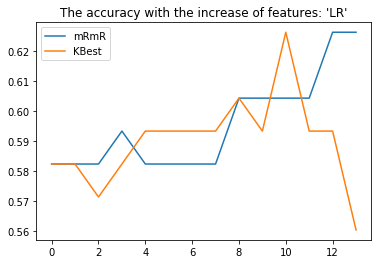

In [23]:
clf = LogisticRegression()
myplot(clf, "LR", mRmR, X_train, y_train, X_test, y_test, 15)

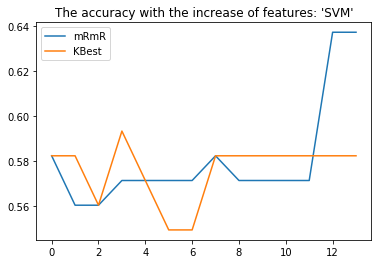

In [24]:
clf = svm.SVC()
myplot(clf, "SVM", mRmR, X_train, y_train, X_test, y_test, 15)

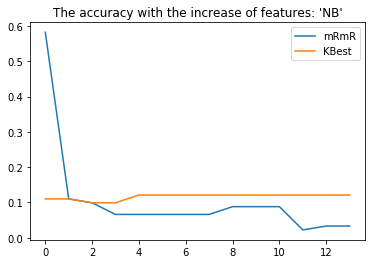

In [25]:
clf = GaussianNB()
myplot(clf, "NB", mRmR, X_train, y_train, X_test, y_test, 15)

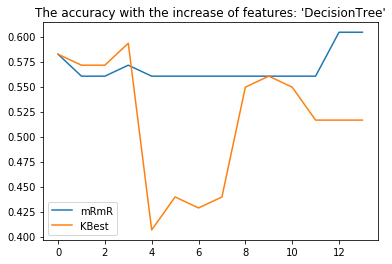

In [26]:
clf = tree.DecisionTreeClassifier()
myplot(clf, "DecisionTree", mRmR, X_train, y_train, X_test, y_test, 15)

### b) Backforward Feature Selection

In [27]:
features = np.array(mRmR.getSelectedFeatures())

In [28]:
# not cross validation, simple test on the validation set
features_new = list(features.copy())
clf2 = tree.DecisionTreeClassifier(random_state=None)
train = 300

def calculate_precision(ft, X, y, train):
    
    clf2.fit(X[:train, ft], y[:train])
    predictions2 = clf2.predict(X[train:, ft])
    precision = np.mean(predictions2 == y[train:])
    return precision

def backward():
    new_precisions = []
    while len(features_new) > 0:
        p_lis = []
        pivot = calculate_precision(features_new, X, y, train)
        print "at time", len(features_new), "pivot =", pivot

        for i in range(len(features_new)):
            try_features = features_new[:i] + features_new[i+1:]
            precision = calculate_precision(try_features, X, y, train)
            p_lis.append(precision)
            #print try_features
            print "reduce index =", features_new[i], "validation precision = ", precision

        if pivot + 1e-4 < np.max(p_lis) :
            idx = np.argmax(p_lis)
            print "reduce the ", features_new[idx], "will increase large precision."
            new_precisions.append(p_lis[idx])
            del features_new[idx]
            print features_new
        else:
            break
            
    return new_precisions

experiments = []
for i in range(3):
    experiments.append(backward())

at time 15 pivot = 0.539473684211
reduce index = 19 validation precision =  0.539473684211
reduce index = 230 validation precision =  0.546052631579
reduce index = 95 validation precision =  0.539473684211
reduce index = 234 validation precision =  0.539473684211
reduce index = 94 validation precision =  0.539473684211
reduce index = 103 validation precision =  0.539473684211
reduce index = 118 validation precision =  0.539473684211
reduce index = 120 validation precision =  0.539473684211
reduce index = 114 validation precision =  0.552631578947
reduce index = 106 validation precision =  0.539473684211
reduce index = 57 validation precision =  0.539473684211
reduce index = 163 validation precision =  0.546052631579
reduce index = 223 validation precision =  0.493421052632
reduce index = 36 validation precision =  0.539473684211
reduce index = 45 validation precision =  0.539473684211
reduce the  114 will increase large precision.
[19, 230, 95, 234, 94, 103, 118, 120, 106, 57, 163, 223

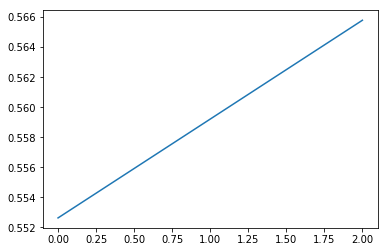

In [29]:
plt.plot(experiments[0])